**House prices in Poland - prediction**

---



---





Project plan : 

1. Loading required libraries and dataset
2. Data preprocessing 
3. Creating new features from existing features
4. Removing outliers 
5. Exploratory data analysis and Data visualisation 
6. Splitting data into training and testing 
7. Finding the best model
8. Final prediction 


Data - https://www.kaggle.com/dawidcegielski/house-prices-in-poland

---



---



**1. Loading required libraries and dataset** 

In [90]:
! git clone https://github.com/arekfirlej/House-Prices-in-Poland--prediction

fatal: destination path 'House-Prices-in-Poland--prediction' already exists and is not an empty directory.


In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from geopy import distance 


#machine learning preparation and evaluation


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

#machine learning models : 


from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor





In [92]:
df = pd.read_csv('House-Prices-in-Poland--prediction/Houses.csv', encoding = 'latin-1')
df.head()

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2.00,23918.00,50.05,19.97,749000.00,3.00,74.05,2021.00
1,1,Praga-Po³udnie Grochowska,Warszawa,3.00,17828.00,52.25,21.11,240548.00,1.00,24.38,2021.00
2,2,Krowodrza Czarnowiejska,Kraków,2.00,22784.00,50.07,19.92,427000.00,2.00,37.00,1970.00
3,3,Grunwald,Poznañ,2.00,4315.00,52.40,16.88,1290000.00,5.00,166.00,1935.00
4,4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.00,11770.00,52.21,20.97,996000.00,5.00,105.00,2020.00


**2. Data preprocessing** 

In [93]:
df.replace('Kraków', 'Krakow', inplace = True)
df.replace('Poznañ', 'Poznan', inplace = True)

df.drop(['address'], axis = 1 , inplace = True)
df.drop(['id'], axis = 1 ,  inplace = True)

df.head()

,Unnamed: 0,city,floor,latitude,longitude,price,rooms,sq,year
0,0,Krakow,2.00,50.05,19.97,749000.00,3.00,74.05,2021.00
1,1,Warszawa,3.00,52.25,21.11,240548.00,1.00,24.38,2021.00
2,2,Krakow,2.00,50.07,19.92,427000.00,2.00,37.00,1970.00
3,3,Poznan,2.00,52.40,16.88,1290000.00,5.00,166.00,1935.00
4,4,Warszawa,1.00,52.21,20.97,996000.00,5.00,105.00,2020.00


In [94]:
df.isnull().sum()

Unnamed: 0    0
city          0
floor         0
latitude      0
longitude     0
price         0
rooms         0
sq            0
year          0
dtype: int64

**3. Creating new features from existing features**

Creating the new feature that will calculate the distance to each city center base on latitude and longitude.






Centers: 

Krakow - Main square

Warszawa - Palace of culture and Science 

Poznan - the Old Market Square 

In [95]:
Krakow_central = (50.049683, 19.944544)
Warszawa_central = (52.225665 , 21.003833)
Poznan_central = (52.409538, 16.931992 )

In [96]:
def to_centre(id):
    coords = (df.iloc[id].latitude, df.iloc[id].longitude) 
    if df.iloc[id].city == 'Krakow':     
        df.iloc[id, df.columns.get_loc('distance')] = round(distance.distance(coords, Krakow_central).km, 2)
    if df.iloc[id].city == 'Warszawa':
      df.iloc[id, df.columns.get_loc('distance')] = round(distance.distance(coords, Warszawa_central).km, 2)
    if df.iloc[id].city == 'Poznan': 
       df.iloc[id, df.columns.get_loc('distance')] = round(distance.distance(coords, Poznan_central).km, 2)

In [97]:
df['distance'] = ""

In [98]:
for x in range(len(df)):
  to_centre(x)

In [99]:
df.head(3)

,Unnamed: 0,city,floor,latitude,longitude,price,rooms,sq,year,distance
0,0,Krakow,2.00,50.05,19.97,749000.00,3.00,74.05,2021.00,1.85
1,1,Warszawa,3.00,52.25,21.11,240548.00,1.00,24.38,2021.00,7.53
2,2,Krakow,2.00,50.07,19.92,427000.00,2.00,37.00,1970.00,2.60


Creating new column with price per square meter based on price and square meter 

In [100]:
 df['price_per_sq'] = round(df['price']/ df['sq'])

In [101]:
df.head(3)

,Unnamed: 0,city,floor,latitude,longitude,price,rooms,sq,year,distance,price_per_sq
0,0,Krakow,2.00,50.05,19.97,749000.00,3.00,74.05,2021.00,1.85,10115.00
1,1,Warszawa,3.00,52.25,21.11,240548.00,1.00,24.38,2021.00,7.53,9867.00
2,2,Krakow,2.00,50.07,19.92,427000.00,2.00,37.00,1970.00,2.60,11541.00


In [102]:
df.drop(['latitude', 'longitude', 'Unnamed: 0'], axis = 1, inplace = True)

In [103]:
df[['floor', 'rooms', 'year', 'distance']] = df[['floor', 'rooms', 'year', 'distance']].astype({'floor':int, 'rooms':int, 'year':int, 'distance':float})

In [104]:
df.head(3)

,city,floor,price,rooms,sq,year,distance,price_per_sq
0,Krakow,2,749000.00,3,74.05,2021,1.85,10115.00
1,Warszawa,3,240548.00,1,24.38,2021,7.53,9867.00
2,Krakow,2,427000.00,2,37.00,1970,2.60,11541.00


**4. Removing outliers**

In [105]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)   #to fix issues with sq in df.describe 

In [106]:
df.describe()

,floor,price,rooms,sq,year,distance,price_per_sq
count,23764.00,23764.00,23764.00,23764.00,23764.00,23764.00,23764.00
mean,2.81,649353.65,2.62,102.72,2000.55,5.96,10760.98
std,2.46,532696.99,1.00,6533.69,48.31,20.92,3861.16
min,0.00,5000.00,1.00,8.80,70.00,0.02,1.00
25%,1.00,411546.12,2.00,42.00,1985.00,2.61,8400.00
50%,2.00,520000.00,3.00,53.89,2019.00,4.43,9948.00
75%,4.00,699999.00,3.00,68.91,2021.00,6.63,12318.25
max,10.00,15000000.00,10.00,1007185.00,2980.00,1148.64,138636.00


Plan based on df.describe: 


* price - to check min and max values 

* rooms - to check max value

* sq - to check min and max values

* year - to check max value

* distance - to check max values

* price_per_sq - to check min and max values


Price : 

In [107]:
outliers_price = df.sort_values('price', ascending = False).groupby('price').head()
outliers_price

,city,floor,price,rooms,sq,year,distance,price_per_sq
12968,Warszawa,9,15000000.00,5,262.00,2017,0.62,57252.00
15169,Warszawa,10,13500000.00,4,236.00,2017,0.62,57203.00
3543,Warszawa,5,10950000.00,5,249.00,2011,2.06,43976.00
129,Warszawa,10,9506700.00,5,271.60,2021,1.31,35003.00
7991,Warszawa,4,9300000.00,5,212.00,2011,2.06,43868.00
...,...,...,...,...,...,...,...,...
21913,Krakow,0,83000.00,1,26.30,2002,6.58,3156.00
11867,Poznan,5,79900.00,3,48.50,2000,1.29,1647.00
23679,Poznan,3,69000.00,1,33.00,2003,4.46,2091.00
22783,Poznan,1,29900.00,2,49.00,2003,2.41,610.00


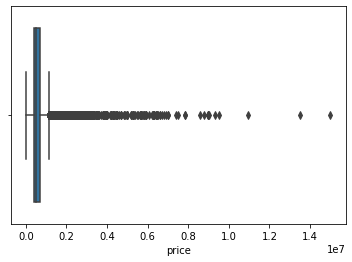

In [108]:
sns.boxplot(x = df['price'])

* Price max values - acceptable
* Price min values - remove lines with price under 30000 ( 2 lines ) 

Rooms:

In [109]:
outliers_rooms = df.sort_values('rooms', ascending = False).groupby('price').head()
outliers_rooms

,city,floor,price,rooms,sq,year,distance,price_per_sq
13662,Krakow,4,6299000.00,10,442.20,2017,3.58,14245.00
19224,Poznan,0,1490000.00,10,179.50,2020,4.46,8301.00
13775,Krakow,0,2800000.00,10,260.00,2020,4.16,10769.00
17507,Warszawa,3,309990.00,10,26.00,1962,0.73,11923.00
16920,Krakow,3,1050000.00,10,220.00,1980,3.45,4773.00
...,...,...,...,...,...,...,...,...
21228,Poznan,0,191700.00,1,27.00,2020,2.73,7100.00
14925,Krakow,6,358110.00,1,34.50,2021,2.62,10380.00
11810,Warszawa,1,276770.00,1,28.63,2022,11.60,9667.00
7434,Krakow,3,235190.00,1,16.22,2021,2.77,14500.00


* Room max values - rows with 10 rooms and small total sq will be removed based on price_per_square check 
* Room min values - acceptable

Square meters: 

In [110]:
outliers_sq = df.sort_values('sq', ascending = False).groupby('price').head()
outliers_sq

,city,floor,price,rooms,sq,year,distance,price_per_sq
6198,Krakow,2,1007185.00,5,1007185.00,2020,7.66,1.00
10798,Warszawa,1,389880.00,2,9000.00,2022,0.73,43.00
18637,Poznan,1,544169.00,4,8065.00,2021,1.29,67.00
5734,Krakow,4,6299000.00,10,442.20,2017,4.03,14245.00
13662,Krakow,4,6299000.00,10,442.20,2017,3.58,14245.00
...,...,...,...,...,...,...,...,...
23628,Krakow,0,135000.00,1,13.00,2020,7.13,10385.00
1749,Warszawa,0,217000.00,1,12.80,1936,3.46,16953.00
2155,Krakow,0,229000.00,1,12.00,2018,2.94,19083.00
6847,Warszawa,0,215000.00,1,11.74,1961,3.55,18313.00


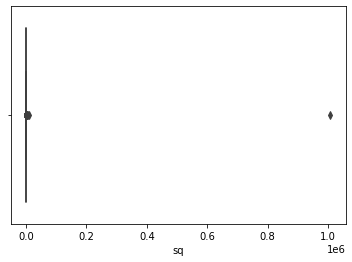

In [111]:
sns.boxplot(x = df['sq'])

In [112]:
df[df.sq > 500].shape[0]

3

* Sq max values - remove lines over 500 ( 3 lines ) 
* sq min values - acceptable

Year: 

In [113]:
outliers_year = df.sort_values('year', ascending = False).groupby('year').head()
outliers_year

,city,floor,price,rooms,sq,year,distance,price_per_sq
4345,Warszawa,8,520000.00,3,56.00,2980,0.73,9286.00
13963,Warszawa,1,499497.00,1,31.29,2024,3.55,15963.00
1638,Warszawa,3,441395.00,3,48.66,2023,0.73,9071.00
6112,Poznan,5,495000.00,2,46.73,2023,4.81,10593.00
15186,Krakow,1,245388.00,2,31.46,2023,8.68,7800.00
...,...,...,...,...,...,...,...,...
10408,Warszawa,9,450000.00,2,47.80,81,0.73,9414.00
14431,Poznan,1,375000.00,3,64.00,80,1.29,5859.00
4513,Warszawa,10,320000.00,1,28.00,80,0.73,11429.00
1032,Warszawa,1,760000.00,3,53.00,75,0.73,14340.00


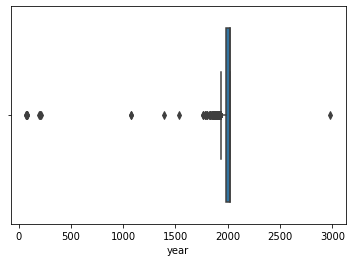

In [114]:
sns.boxplot(x = df['year'])

In [115]:
print('Rows with year before 1800: ' , df[df.year < 1800].shape[0])
print('Rows with year over 2024: ',df[df.year > 2024].shape[0])

Rows with year before 1800:  18
Rows with year over 2024:  1


* Year max values - remove lines over 2024 ( 1 line ) 
* Year min values = remove all lines below 1800 (18 lines) 

Distance: 

In [116]:
outliers_distance = df.sort_values('distance', ascending = False).groupby('price').head()
outliers_distance

,city,floor,price,rooms,sq,year,distance,price_per_sq
21692,Warszawa,2,540000.00,2,43.85,1955,1148.64,12315.00
5586,Krakow,1,479000.00,3,56.80,1978,740.70,8433.00
3906,Krakow,2,429000.00,7,207.00,1936,740.70,2072.00
12804,Krakow,1,456000.00,3,57.80,2020,659.30,7889.00
15185,Krakow,4,490000.00,2,42.00,1910,538.18,11667.00
...,...,...,...,...,...,...,...,...
17399,Poznan,3,293590.00,2,37.40,2022,0.15,7850.00
3015,Poznan,2,358931.00,2,51.10,2021,0.15,7024.00
11391,Poznan,3,358931.00,2,51.10,2021,0.15,7024.00
17974,Poznan,5,456085.00,3,58.41,2020,0.15,7808.00


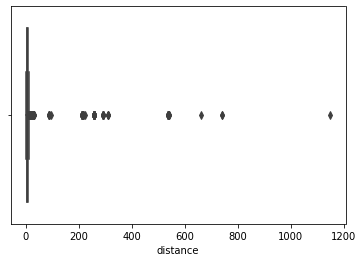

In [117]:
sns.boxplot(x = df['distance'])

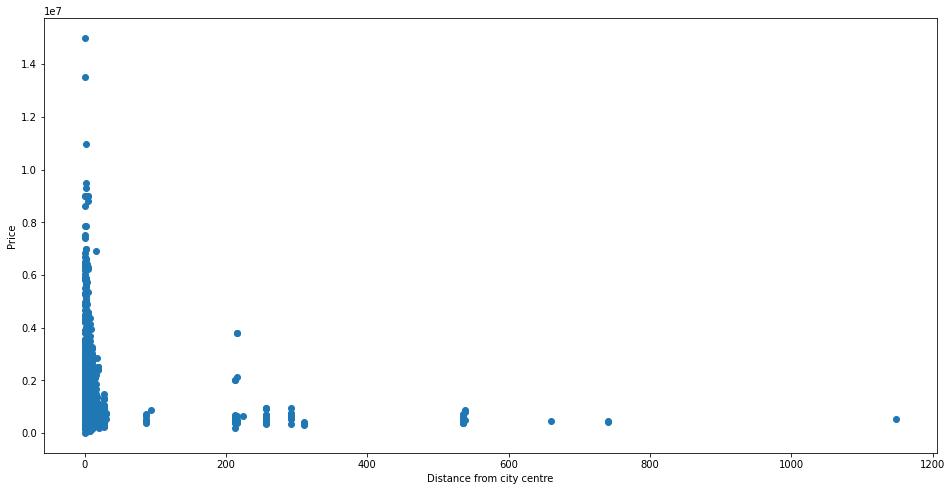

In [118]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['distance'], df['price'])
ax.set_xlabel('Distance from city centre')
ax.set_ylabel('Price')
plt.show()

In [119]:
print('Rows with distance over 50km :', df[df.distance > 50].shape[0])

Rows with distance over 50km : 86


* distance max values = remove all the lines > 50 km (86 lines) 
* distance min values - acceptable 

Price per square meter: 

In [120]:
outliers_pps = df.sort_values('price_per_sq', ascending = False).groupby('price_per_sq').head()
outliers_pps

,city,floor,price,rooms,sq,year,distance,price_per_sq
1349,Warszawa,4,1220000.00,4,8.80,2019,0.73,138636.00
20669,Warszawa,3,9008000.00,4,79.41,2022,4.54,113437.00
21892,Warszawa,4,6053000.00,3,60.67,2022,0.73,99769.00
12968,Warszawa,9,15000000.00,5,262.00,2017,0.62,57252.00
15169,Warszawa,10,13500000.00,4,236.00,2017,0.62,57203.00
...,...,...,...,...,...,...,...,...
22783,Poznan,1,29900.00,2,49.00,2003,2.41,610.00
10084,Warszawa,1,5000.00,2,50.00,2009,0.73,100.00
18637,Poznan,1,544169.00,4,8065.00,2021,1.29,67.00
10798,Warszawa,1,389880.00,2,9000.00,2022,0.73,43.00


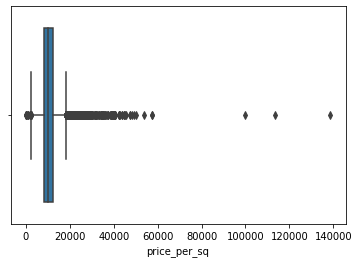

In [121]:
sns.boxplot(x = df['price_per_sq'])

In [122]:
print('Price per square meter over 50,000: ' , df[df.price_per_sq > 50000].shape[0])
print('Price per square meter below 2000: ', df[df.price_per_sq < 2000].shape[0])

Price per square meter over 50,000:  6
Price per square meter below 2000:  8


* pps max values =  remove lines over 50000 ( 5 lines) 
* pps min values = remove lines : under 2000  ( 8 lines) 

Removing outliers total sum up: 

* Price min values - remove lines under 30000 ( 2 lines )

* Sq max values - remove lines over 500 ( 3 lines )

* year max values - remove lines over 2024 ( 1 line )

* year min values = remove all lines below 1800 (18 lines)

* distance max values = remove all the lines > 50 km (86 lines)

* pps max values =  remove lines over 50000 ( 6 line) 

* pps min values = remove lines : under 2000  ( 8 lines)

In [123]:
df.shape

(23764, 8)

In [124]:
rows_to_remove = df[  (df['price'] < 30000) | (df['sq'] > 500) | (df['year'] > 2024) | (df['year'] < 1800) | (df['distance'] > 50) | (df['price_per_sq'] > 50000 ) | (df['price_per_sq'] < 2000) ].index

In [125]:
df.drop(rows_to_remove, axis = 0,  inplace = True)

In [126]:
df.shape

(23645, 8)

In [127]:
df.describe()

,floor,price,rooms,sq,year,distance,price_per_sq
count,23645.00,23645.00,23645.00,23645.00,23645.00,23645.00,23645.00
mean,2.81,647218.00,2.62,59.59,2001.43,4.88,10744.60
std,2.46,510899.20,1.00,28.25,29.36,3.15,3624.34
min,0.00,69000.00,1.00,11.00,1800.00,0.02,2030.00
25%,1.00,411437.00,2.00,42.00,1985.00,2.61,8400.00
50%,2.00,520354.00,3.00,53.88,2019.00,4.43,9948.00
75%,4.00,699999.00,3.00,68.90,2021.00,6.55,12318.00
max,10.00,10950000.00,10.00,442.20,2024.00,30.56,50000.00


**5. Exploratory data analysis and Data visualisation**

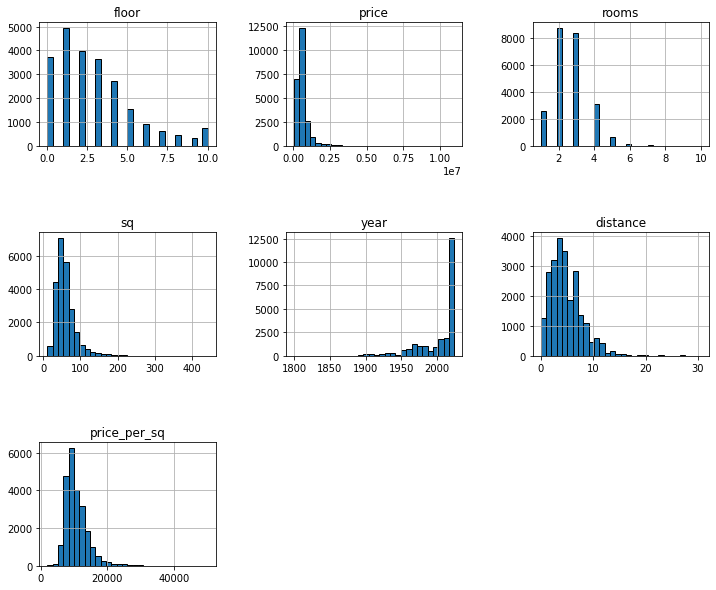

In [128]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [129]:
print('Total rows: ', df['city'].shape[0])
print('Krakow: ' , df[df.city == 'Krakow'].shape[0])
print('Warszawa: ',df[df.city == 'Warszawa'].shape[0])
print('Poznan: ', df[df.city == 'Poznan'].shape[0])


Total rows:  23645
Krakow:  9697
Warszawa:  9811
Poznan:  4137


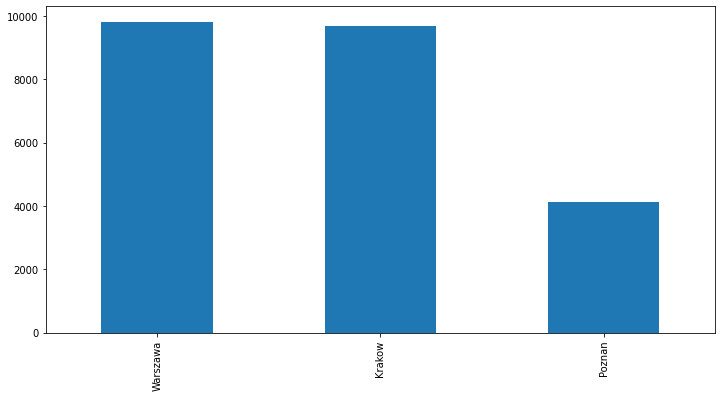

In [130]:
plt.figure( figsize = (12,6))
df['city'].value_counts().plot(kind = 'bar')
plt.show()

In total, our dataset contains 23,645 houses. 

Warszawa and Krakow have slightly less than 10,000 each and Poznan has around 4000

In [131]:
pps_average = df["price_per_sq"].mean()
print("Price per square meter average : ", pps_average)

Price per square meter average :  10744.603975470502


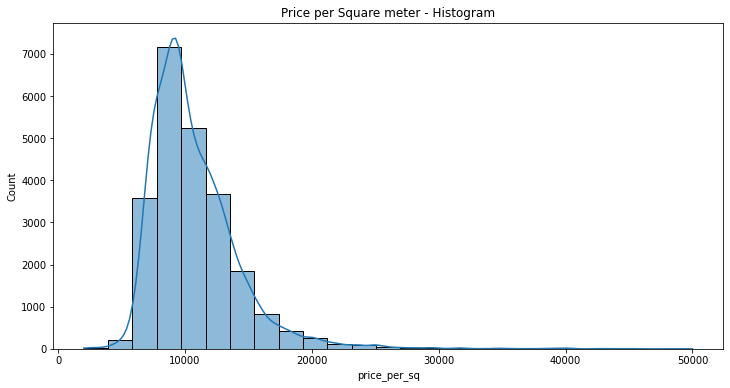

In [132]:
plt.figure(figsize = (12,6))
pps = sns.histplot( x = 'price_per_sq', data = df, bins = 25, kde = True)
pps.set_title('Price per Square meter - Histogram')
plt.show()

In [133]:
pps_mean = df.groupby('city')['price_per_sq'].mean().sort_values(ascending = False)
pps_mean

city
Warszawa   12199.07
Krakow     10430.61
Poznan      8031.28
Name: price_per_sq, dtype: float64

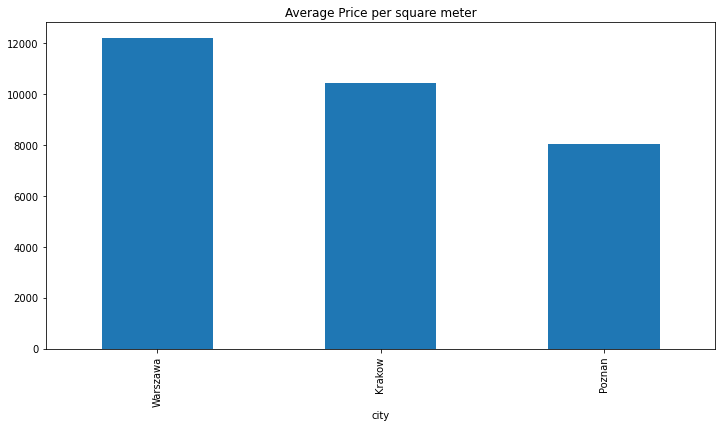

In [134]:
plt.figure(figsize = (12,6))
pps_mean.plot(kind = 'bar', title = 'Average Price per square meter')
plt.show()

The average price per square meter for our dataset is 10,744.60 zl.

The average price per square meter for Warszawa is the highest and it's     12,199 zl, for Krakow it's 10,430 zl and for Poznan 8031 zl 

In [135]:
price_mean = df.groupby('city')['price'].mean().sort_values(ascending = False)
price_mean

city
Warszawa   775531.24
Krakow     593497.79
Poznan     468838.40
Name: price, dtype: float64

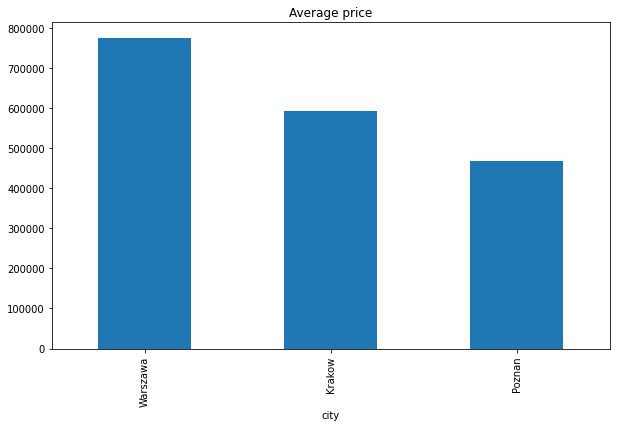

In [136]:
plt.figure(figsize = (10,6))
price_mean.plot(kind = 'bar', title = 'Average price')
plt.show()

The average price for Warszawa is the highest and it's 775 531 zl 

For Krakow it's 593 497 zl  and for Poznan 468 838 zl.

In [137]:
dist_krakow = df.loc[df['city'] == 'Krakow']
dist_warszawa = df.loc[df['city'] == 'Warszawa']
dist_poznan = df.loc[df['city'] == 'Poznan']

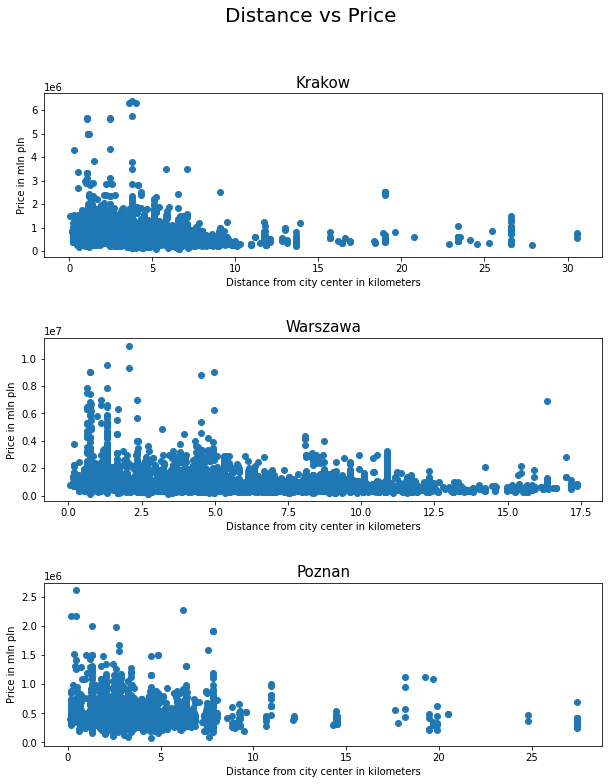

In [138]:
fig, axes = plt.subplots(figsize = (10,12), nrows = 3, ncols = 1 )
fig.suptitle('Distance vs Price ', fontsize = 20)
plt.subplots_adjust(hspace = 0.5)


axes[0].set_title('Krakow', fontsize = 15) 
axes[0].scatter(dist_krakow['distance'], dist_krakow['price'])
axes[0].set_xlabel('Distance from city center in kilometers', fontsize = 10)
axes[0].set_ylabel('Price in mln pln', fontsize = 10)

axes[1].set_title('Warszawa', fontsize = 15)
axes[1].scatter(dist_warszawa['distance'], dist_warszawa['price'])
axes[1].set_xlabel('Distance from city center in kilometers', fontsize = 10)
axes[1].set_ylabel('Price in mln pln', fontsize = 10)


axes[2].set_title('Poznan', fontsize = 15)
axes[2].scatter(dist_poznan['distance'], dist_poznan['price'])
axes[2].set_xlabel('Distance from city center in kilometers', fontsize = 10)
axes[2].set_ylabel('Price in mln pln', fontsize = 10)


plt.show()

The distance from city center has an impact on the price. The closer to the center the highest the prices is

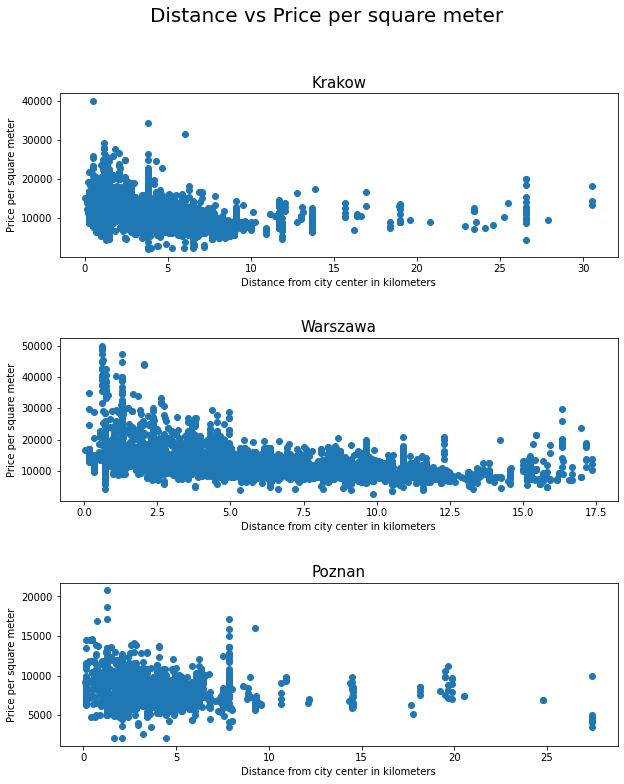

In [139]:
fig, axes = plt.subplots(figsize = (10,12), nrows = 3, ncols = 1 )
fig.suptitle('Distance vs Price per square meter ', fontsize = 20)
plt.subplots_adjust(hspace = 0.5)


axes[0].set_title('Krakow', fontsize = 15) 
axes[0].scatter(dist_krakow['distance'], dist_krakow['price_per_sq'])
axes[0].set_xlabel('Distance from city center in kilometers', fontsize = 10)
axes[0].set_ylabel('Price per square meter', fontsize = 10)

axes[1].set_title('Warszawa', fontsize = 15)
axes[1].scatter(dist_warszawa['distance'], dist_warszawa['price_per_sq'])
axes[1].set_xlabel('Distance from city center in kilometers', fontsize = 10)
axes[1].set_ylabel('Price per square meter', fontsize = 10)


axes[2].set_title('Poznan', fontsize = 15)
axes[2].scatter(dist_poznan['distance'], dist_poznan['price_per_sq'])
axes[2].set_xlabel('Distance from city center in kilometers', fontsize = 10)
axes[2].set_ylabel('Price per square meter', fontsize = 10)


plt.show()

The higest price per meter values we can see for houses which are closer to the city center 

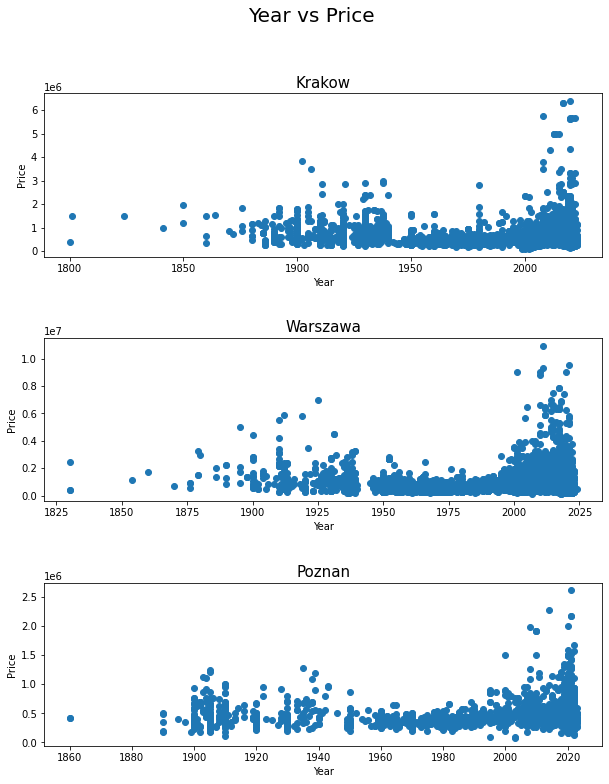

In [140]:
fig, axes = plt.subplots(figsize = (10,12), nrows = 3, ncols = 1 )
fig.suptitle('Year vs Price ', fontsize = 20)
plt.subplots_adjust(hspace = 0.5)


axes[0].set_title('Krakow', fontsize = 15) 
axes[0].scatter(dist_krakow['year'], dist_krakow['price'])
axes[0].set_xlabel('Year', fontsize = 10)
axes[0].set_ylabel('Price', fontsize = 10)

axes[1].set_title('Warszawa', fontsize = 15)
axes[1].scatter(dist_warszawa['year'], dist_warszawa['price'])
axes[1].set_xlabel('Year', fontsize = 10)
axes[1].set_ylabel('Price', fontsize = 10)


axes[2].set_title('Poznan', fontsize = 15)
axes[2].scatter(dist_poznan['year'], dist_poznan['price'])
axes[2].set_xlabel('Year', fontsize = 10)
axes[2].set_ylabel('Price', fontsize = 10)


plt.show()

The most expensive houses are these built after 2000, some old houses built in 20/21 century might be more expensive 

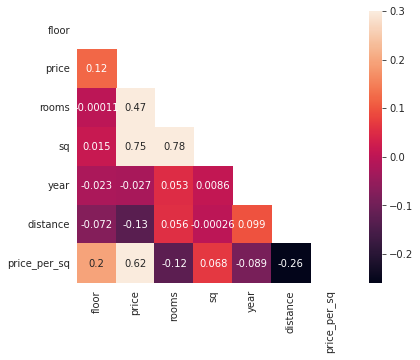

In [141]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot = True)

Price is highly correlated with price per square meter and, number of rooms and total square meter of the house 

**6. Splitting data into training and testing**

In [142]:
 df_dummies = pd.get_dummies(df.city)
 df_with_dummies = df.join(df_dummies)
 df_with_dummies.drop('city', axis =1, inplace = True)
 df_with_dummies.head()

,floor,price,rooms,sq,year,distance,price_per_sq,Krakow,Poznan,Warszawa
0,2,749000.00,3,74.05,2021,1.85,10115.00,1,0,0
1,3,240548.00,1,24.38,2021,7.53,9867.00,0,0,1
2,2,427000.00,2,37.00,1970,2.60,11541.00,1,0,0
3,2,1290000.00,5,166.00,1935,3.42,7771.00,0,1,0
4,1,996000.00,5,105.00,2020,2.60,9486.00,0,0,1


In [143]:
X = df_with_dummies.drop(['price', 'price_per_sq'], axis = 1 )
y = df_with_dummies['price']

print(X.shape)
print(y.shape)

(23645, 8)
(23645,)


In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Normalization

In [145]:
scaler = StandardScaler()

normalized_x_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)


normalized_x_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns) 

**7.Searching best model**


We will try to find the best model out of: 

* Random Forest Regressors
* Gradient Boosting 
* KNN
* XGB Regressor 




We will try to find hyperparameters for them to improve their efficiency 

In [146]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        
           'random_forest' : {
            'model' :RandomForestRegressor(),
            'params': {
                'n_estimators' : [150, 200, 250],
                'min_samples_split': [2,3,5],
                'max_depth' : [20,50,100],
                'max_features' : ['auto','sqrt'],
                'min_samples_leaf' : [1,3,4],
                'bootstrap' : [True, False]
            }
        } }



    scores = []

    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

#find_best_model_using_gridsearchcv(X_train,y_train)

In [147]:
 def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'Gradient Boosting Regressor': {
            'model' : GradientBoostingRegressor(), 
            'params' : {
                'learning_rate' : [0.1, 0.2, 0.5],
                'n_estimators' : [1500, 3000, 5000]
            }
        }, 'KNN' : {
            'model' : KNeighborsRegressor(), 
            'params' : {
                'n_neighbors' : [5,10,15, 20, 30, 50],
                'leaf_size' : [20,30,50],
                'weights' : ['uniform', 'distance'],
                'algorithm' : ['auto', 'ball_tree']
            }
        }, 'XGB Regressor' : {
            'model': XGBRegressor(),
            'params': {
                'eta': [0.01, 0.1, 0.2, 0.3],
                'max_depth' :[5, 9, 12, 15, 20]
            }

        }
    }


    scores = []

    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

#find_best_model_using_gridsearchcv(normalized_x_train,y_train)

Models with best Hyperparameters based on Gridsearch

In [148]:
model_rf = RandomForestRegressor(max_depth = 100, min_samples_split = 2 , n_estimators = 200, bootstrap = False, max_features = 'sqrt', min_samples_leaf = 1 )

model_gb = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 3000 )
model_xgb = XGBRegressor(eta = 0.01, max_depth = 12)
model_knn = KNeighborsRegressor(n_neighbors = 10, algorithm = 'auto', leaf_size = 30 , weights = 'distance'  )

In [149]:
models = {

    'XGBRegressor':model_xgb,
    'KNN': model_knn, 
    'Gradient Boosting' : model_gb
    
}

models_forest =  {
    
    'RandomForestRegressor':model_rf
}

In [150]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

model_names = []
model_rmse = []
model_r2 = [] 
model_absolute = []
cv_scores = [] 

for name,model in models.items():
    model_fitting = model.fit(normalized_x_train,y_train)
    predicted = model_fitting.predict(normalized_x_test)
    score_rmse = np.sqrt(mean_squared_error(y_test, predicted))
    score_r2 = metrics.r2_score(y_test, predicted)
    score_absolute = metrics.mean_absolute_error(y_test, predicted)
    cvscore = cross_val_score(model, X, y, cv = cv)
    model_rmse.append(score_rmse)
    model_r2.append(score_r2)
    model_absolute.append(score_absolute)
    cv_scores.append(np.mean(cvscore))
    model_names.append(name)
    print(f'{name} : {score_rmse} , {score_r2}, {score_absolute}, {cv_scores}')

  
for name,model in models_forest.items():
    model_fitting = model.fit(X_train,y_train)
    predicted = model_fitting.predict(X_test)
    score_rmse = np.sqrt(mean_squared_error(y_test, predicted))
    score_r2 = metrics.r2_score(y_test, predicted)
    score_absolute = metrics.mean_absolute_error(y_test, predicted)
    cvscore = cross_val_score(model, X, y, cv = cv)
    model_rmse.append(score_rmse)
    model_r2.append(score_r2)
    model_absolute.append(score_absolute)
    cv_scores.append(np.mean(cvscore))
    model_names.append(name)
    print(f'{name} : {score_rmse} , {score_r2}, {score_absolute}, {cv_scores}')


[14:48:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:49:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor : 197028.02954046463 , 0.8480092251297762, 71195.48529849168, [0.8579106033033966]
KNN : 218970.2337220676 , 0.8122710007988607, 82827.38069555997, [0.8579106033033966, 0.7849930827183658]
Gradient Boosting : 208813.846313837

In [151]:
df_results = pd.DataFrame([model_names,model_rmse, model_r2, model_absolute, cv_scores ])
df_results = df_results.transpose()
df_results = df_results.rename(columns={0:'Model',1:'RMSE', 2: 'R2', 3: 'MAE', 4: 'CV score'}).sort_values(by='MAE',ascending=True)
df_results

,Model,RMSE,R2,MAE,CV score
3,RandomForestRegressor,192208.28,0.86,65995.94,0.88
0,XGBRegressor,197028.03,0.85,71195.49,0.86
2,Gradient Boosting,208813.85,0.83,82461.96,0.87
1,KNN,218970.23,0.81,82827.38,0.78


We choose Random Forest Regressor with hyperparametes selected in GridSearch

* the lowest MAE
* the best R2 score
* the best CV score

In [152]:
model_rf.fit(X_train.values, y_train)

y_pred = model_rf.predict(X_test.values)

Checking predicted values for some rows

In [153]:
num = 2022

print('predicted: ', y_pred[num])
print('from data set: ', y_test.iloc[num])

print("")
print(X_test.iloc[num])
print("")
print('difference: ' , y_pred[num] - y_test.iloc[num] )

predicted:  664030.8
from data set:  660000.0

floor         3.00
rooms         3.00
sq           75.10
year       2002.00
distance      3.88
Krakow        1.00
Poznan        0.00
Warszawa      0.00
Name: 1112, dtype: float64

difference:  4030.8000000000466


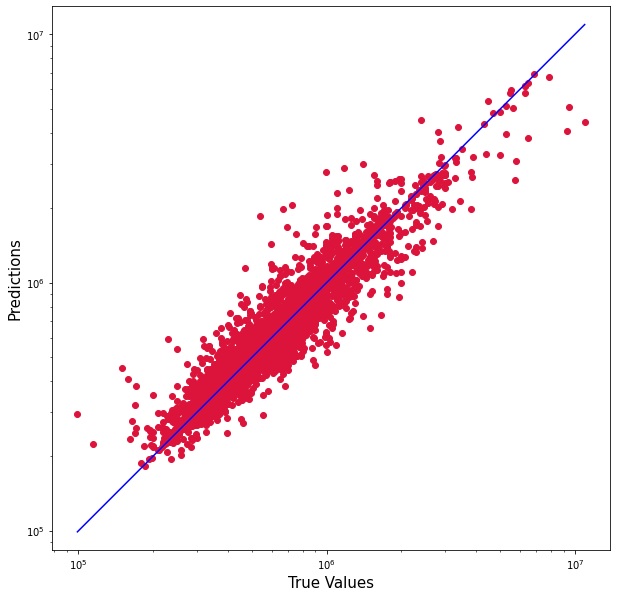

In [154]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

**8.Final prediction- App**

In [155]:
while True: 
  your_house = []
  # floor = input("Which floor ")
  your_house.append(int(input("Which floor: ")))
  your_house.append(int(input('How many rooms: ')))
  pps = input("How many square meters: ")
  your_house.append(float(pps))
  your_house.append(int(input('Build Year: ')))
  your_house.append(float(input('How many kilometers from city center : ')))
  city = input("Which city (K/W/P):  ")
  if city == "K":
    your_house.append(int(1))
    your_house.append(int(0))
    your_house.append(int(0))
  if city == "P":
    your_house.append(int(0))
    your_house.append(int(1))
    your_house.append(int(0))
  if city == "W":
    your_house.append(int(0))
    your_house.append(int(0))
    your_house.append(int(1))


  your_house_final = np.array(your_house)
  price = model_rf.predict(your_house_final.reshape(1, -1))
  price_final = price.tolist()
  print("")
  print('Your estimated price is: ', round(price_final[0],1), 'zl')
  print('Estimated price per square meter is: ', int(int(price_final[0])/ int(pps)), 'zl' )
  print("")
  final = input("Do you want to check another house? (Y/N) ")
  if final.lower() == 'y':
    continue 
  else:
    print("")
    print("Thank you")
    break

Which floor: 4
How many rooms: 2
How many square meters: 42
Build Year: 2017
How many kilometers from city center : 7
Which city (K/W/P):  K

Your estimated price is:  426674.0 zl
Estimated price per square meter is:  10158 zl

Do you want to check another house? (Y/N) n

Thank you
